In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os, csv, json
import pandas as pd
import scipy.optimize as sp
import itertools

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl

%run /home/guaravtenkila/Disorder_sims/Ising_RSRG/aux_funcs.py
%run /home/guaravtenkila/Disorder_sims/Ising_RSRG/RSRG_class.py
%run /home/guaravtenkila/Disorder_sims/Ising_RSRG/aux_funcs.py

In [2]:
run_dir = "mag_ratio_bdry_fine/"
#run_dir = "/home/guaravtenkila/Disorder_sims/Ising_RSRG/log_bdry_output/bdry_sweep/"

log_file = pd.read_csv(run_dir+"bdry_log_file.csv")
ts_list = log_file['ts'].tolist()
#log_file['L'].tolist()
selected_files = log_file
selected_files

ts_list = selected_files['ts'].tolist()
n_runs_list = selected_files['n_runs'].tolist()
L_list = selected_files['L'].tolist()

selected_files

,L,steps,w_blk,w_bdry,w_mixed,n_runs,runtime,ts
0,"(50, 20)",999,6.6,2.00,6.6,6400,255.257960,251967825020.066.0
1,"(50, 20)",999,6.6,2.05,6.6,6400,255.361737,252269445020.566.0
2,"(50, 20)",999,6.6,2.10,6.6,6400,254.888445,252575745021.066.0
3,"(50, 20)",999,6.6,2.15,6.6,6400,258.723000,252884575021.566.0
4,"(50, 20)",999,6.6,2.20,6.6,6400,259.661469,253190935022.066.0
5,"(50, 20)",999,6.6,2.25,6.6,6400,274.597225,253509615022.566.0
6,"(50, 20)",999,6.6,2.30,6.6,6400,273.508596,253876615023.066.0
7,"(50, 20)",999,6.6,2.35,6.6,6400,272.980157,254200475023.566.0
8,"(50, 20)",999,6.6,2.40,6.6,6400,282.584859,254533815024.066.0
9,"(50, 20)",999,6.6,2.45,6.6,6400,287.941723,254878265024.566.0


In [19]:
rank = 100
inst = 10
i_num = f"{rank:02}" + f"{inst:02}"
i_num

'10010'

In [4]:
def output_reader_bdry(measure_list, fname):
    hblk_dist_dict = [{} for _ in range(len(measure_list))]
    hbdry_dist_dict = [{} for _ in range(len(measure_list))]
    J_blk_blk_dict = [{} for _ in range(len(measure_list))]
    J_bdry_bdry_dict = [{} for _ in range(len(measure_list))]
    J_blk_bdry_dict = [{} for _ in range(len(measure_list))]

    #In2029_hbd_m19

    with open(fname, 'r') as reader:
        next(reader)
        for line in reader:
            if line[6]=='_': inst_end = 6
            elif line[7]=='_': inst_end = 7
            else: print("Read error")
            inst_num = int(line[2:inst_end])
            coupling_type = line[inst_end+1:inst_end+4]
            measure_ind = int(line[inst_end+6:inst_end+8])
            couplings = np.array(json.loads(line[inst_end+8:]))
            
            if coupling_type=='hbl':
                hblk_dist_dict[measure_ind][inst_num] = couplings
            elif coupling_type=='hbd':
                hbdry_dist_dict[measure_ind][inst_num] = couplings
            elif coupling_type== 'Jll':
                J_blk_blk_dict[measure_ind][inst_num] = couplings
            elif coupling_type== 'Jrr':
                J_bdry_bdry_dict[measure_ind][inst_num] = couplings
            elif coupling_type== 'Jlr':
                J_blk_bdry_dict[measure_ind][inst_num] = couplings
    return hblk_dist_dict, hbdry_dist_dict, J_blk_blk_dict, J_bdry_bdry_dict, J_blk_bdry_dict

In [5]:
ts = str(ts_list[31])
fname = run_dir+"LIsingB_2D_output_"+ts+".txt"

with open(run_dir+"LIsingB_2D_input_"+ts+".pkl", "rb") as fp:   
    input_dict = pickle.load(fp)

measure_list = input_dict['measure_list']

hblk_dist_dict, hbdry_dist_dict, \
J_blk_blk_dict, J_bdry_bdry_dict, J_blk_bdry_dict = output_reader_bdry(measure_list, fname)

In [6]:
hblk_dist_list, hbdry_dist_list = [], []
J_blk_blk_list, J_blk_bdry_list, J_bdry_bdry_list = [], [], []
for i in range(len(measure_list)-3):
    hblk_dist_list.append(np.concatenate(tuple(hblk_dist_dict[i].values())))
    hbdry_dist_list.append(np.concatenate(tuple(hbdry_dist_dict[i].values())))
    J_blk_blk_list.append(np.concatenate(tuple(J_blk_blk_dict[i].values())))
    J_blk_bdry_list.append(np.concatenate(tuple(J_blk_bdry_dict[i].values())))
    J_bdry_bdry_list.append(np.concatenate(tuple(J_bdry_bdry_dict[i].values())))

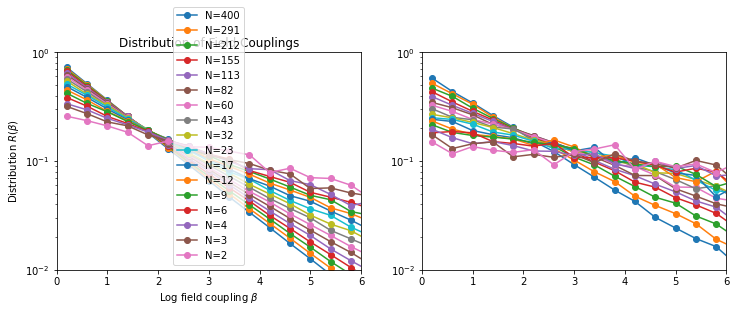

In [7]:
measure_list = input_dict['measure_list']
Lx, Ly = input_dict['L']
spins_left = Lx*Ly - measure_list
n_runs = input_dict['n_runs']
n_bins_h = 30
width_blk_list = []
width_bdry_list = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

for i,step in enumerate(spins_left[:-3]): 
    n_blk,bins_blk = np.histogram(hblk_dist_list[i], density=True, bins = n_bins_h, range=(0,12))
    width_blk = bins_blk[1]-bins_blk[0]
    x_blk = (bins_blk[1:]-width_blk/2)
    y_blk = n_blk 

    popt, pcov = curve_fit(exponential_dist_norm, x_blk[1:5], y_blk[1:5])
    #plt.plot(x, exponential_dist_norm(x, *popt))
    width_blk_list.append(1/(popt[0]+1e-10))
    
    n_bdry,bins_bdry = np.histogram(hbdry_dist_list[i], density=True, bins = n_bins_h, range=(0,12))
    width_bdry = bins_bdry[1]-bins_bdry[0]
    x_bdry = (bins_bdry[1:]-width_bdry/2)
    y_bdry = n_bdry
    if i%1==0:
        axes[0].plot(x_blk, y_blk, label="N="+str(step), marker='o')
        axes[1].plot(x_bdry, y_bdry, label="N="+str(step), marker='o')

    popt, pcov = curve_fit(exponential_dist_norm, x_bdry[1:5], y_bdry[1:5])
    #plt.plot(x, exponential_dist_norm(x, *popt))
    width_bdry_list.append(1/(popt[0]+1e-10))

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim(1e-2, 1)
axes[0].set_xlim(0, 6)

axes[1].set_ylim(1e-2, 1)
axes[1].set_xlim(0, 6)
#plt.xlim(0, 6)
#plt.ylim(1e-1, 1)

axes[0].set_xlabel(r"Log field coupling $\beta$")
axes[0].set_ylabel(r"Distribution $R(\beta)$")
axes[0].set_title("Distribution of Field Couplings")
#plt.yscale('log')
axes[0].legend()

[0.21238769 3.65269058]
[0.23189135 6.02102125]


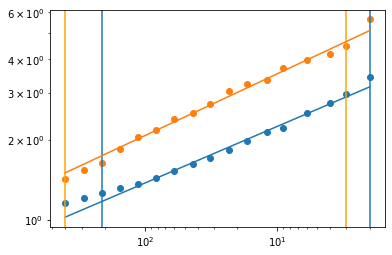

In [30]:
x = (Lx*Ly - measure_list)[:-3]


plt.scatter(x, width_blk_list)


start = 2
end = -1

plt.axvline(x=x[start])
plt.axvline(x = x[end])
popt, pcov = curve_fit(power_law_scale, x[start:end], width_blk_list[start:end])
plt.plot(x, power_law_scale(x, *popt))
print(popt)
plt.scatter(x, width_bdry_list)

start = 0
end = -2

plt.axvline(x=x[start], c='orange')
plt.axvline(x = x[end], c='orange')

popt, pcov = curve_fit(power_law_scale, x[start:end], width_bdry_list[start:end])
plt.plot(x, power_law_scale(x, *popt))
print(popt)
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')


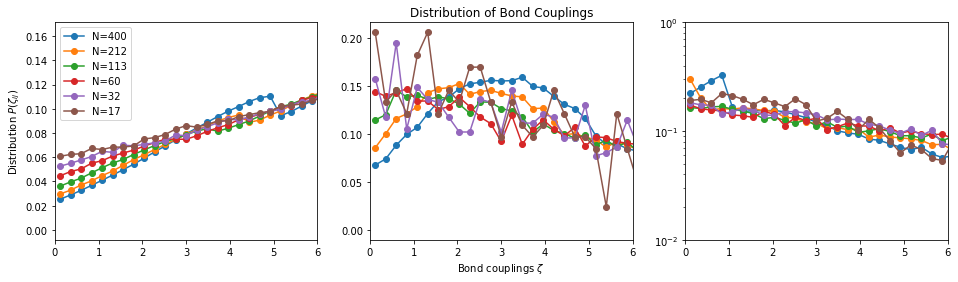

In [8]:
measure_list = input_dict['measure_list']
Lx, Ly = input_dict['L']
spins_left = Lx*Ly - measure_list
n_runs = input_dict['n_runs']
n_bins_h = 50
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

for i,step in enumerate(spins_left[:-8]): 
    n_blk,bins_blk = np.histogram(J_blk_blk_list[i], density=True, bins = n_bins_h, range=(0,12))
    width_blk = bins_blk[1]-bins_blk[0]
    x_blk = (bins_blk[1:]-width_blk/2)
    y_blk = n_blk 

    #popt, pcov = curve_fit(exponential_dist_norm, x_blk[:15], y_blk[:15])
    #plt.plot(x, exponential_dist_norm(x, *popt))
    #width_blk_list.append(1/popt[0])
    
    n_bdry,bins_bdry = np.histogram(J_bdry_bdry_list[i], density=True, bins = n_bins_h, range=(0,12))
    width_bdry = bins_bdry[1]-bins_bdry[0]
    x_bdry = (bins_bdry[1:]-width_bdry/2)
    y_bdry = n_bdry
    
    n_mixed,bins_mixed = np.histogram(J_blk_bdry_list[i], density=True, bins = n_bins_h, range=(0,12))
    width_mixed = bins_bdry[1]-bins_bdry[0]
    x_mixed = (bins_mixed[1:]-width_mixed/2)
    y_mixed = n_mixed
    
    if i%2==0:
        axes[0].plot(x_blk, y_blk, label="N="+str(step), marker='o')
        axes[1].plot(x_mixed, y_mixed, marker='o')
        axes[2].plot(x_bdry, y_bdry, label="N="+str(step), marker='o')



axes[0].set_xlim(0, 6)

axes[1].set_xlim(0, 6)
plt.xlim(0, 6)
plt.ylim(1e-2, 1)

axes[1].set_xlabel(r"Bond couplings $\zeta$")
axes[0].set_ylabel(r"Distribution $P(\zeta_{ij})$")
axes[1].set_title("Distribution of Bond Couplings")
plt.yscale('log')
axes[0].legend()

In [273]:
L_list = [20, 40]
w_vals_comp = []
psi_vals_bdry_comp = []
psi_vals_blk_comp = []
n_bins_h = 40

for L in L_list:
    psi_vals_blk, psi_vals_bdry, w_vals_ordered = [], [], []
    #fixed_length_slice = log_file[lambda df: (df['L'] == L)]
    fixed_length_slice = log_file[lambda df: (df['L'] == '(50, '+str(L)+')')]
    
    ts_list = fixed_length_slice['ts'].tolist()
    w_vals = fixed_length_slice['w_bdry'].tolist()
    for index, ts in enumerate(ts_list):
        print(L, index)
        fname = run_dir+"LIsingB_2D_output_"+ts+".txt"

        with open(run_dir+"LIsingB_2D_input_"+ts+".pkl", "rb") as fp:   
            input_dict = pickle.load(fp)

        measure_list = input_dict['measure_list'][:-3]

        hblk_dist_dict, hbdry_dist_dict,\
        J_blk_blk_dict, J_bdry_bdry_dict, J_blk_bdry_dict = output_reader_bdry(measure_list, fname)
        
        hblk_dist_list, hbdry_dist_list = [], []
        J_blk_blk_list, J_blk_bdry_list, J_bdry_bdry_list = [], [], []
        for i in range(len(measure_list)):
            hblk_dist_list.append(np.concatenate(tuple(hblk_dist_dict[i].values())))
            hbdry_dist_list.append(np.concatenate(tuple(hbdry_dist_dict[i].values())))
            J_blk_blk_list.append(np.concatenate(tuple(J_blk_blk_dict[i].values())))
            J_blk_bdry_list.append(np.concatenate(tuple(J_blk_bdry_dict[i].values())))
            J_bdry_bdry_list.append(np.concatenate(tuple(J_bdry_bdry_dict[i].values())))
            
        Lx, Ly = input_dict['L']
        spins_left = Lx*Ly - measure_list
        n_runs = input_dict['n_runs']
        width_blk_list = []
        width_bdry_list = []

        for i,step in enumerate(spins_left[:-1]): 
            n_blk,bins_blk = np.histogram(hblk_dist_list[i], density=True, bins = n_bins_h, range=(0,12))
            width_blk = bins_blk[1]-bins_blk[0]
            x_blk = (bins_blk[1:]-width_blk/2)
            y_blk = n_blk 

            popt, pcov = curve_fit(exponential_dist_norm, x_blk[1:10], y_blk[1:10])
            #plt.plot(x, exponential_dist_norm(x, *popt))
            width_blk_list.append(1/(popt[0]+1e-10))

            n_bdry,bins_bdry = np.histogram(hbdry_dist_list[i], density=True, bins = n_bins_h, range=(0,12))
            width_bdry = bins_bdry[1]-bins_bdry[0]
            x_bdry = (bins_bdry[1:]-width_bdry/2)
            y_bdry = n_bdry

            popt, pcov = curve_fit(exponential_dist_norm, x_bdry[1:10], y_bdry[1:10])
            #plt.plot(x, exponential_dist_norm(x, *popt))
            width_bdry_list.append(1/(popt[0]+1e-10))
        
        x = (Lx*Ly - measure_list)[:-1]
        start = 4
        end = -2
        w_vals_ordered.append(w_vals[index])
        popt, pcov = curve_fit(power_law_scale, x[start:end], width_blk_list[start:end])
        psi_vals_blk.append(popt[0])
        popt, pcov = curve_fit(power_law_scale, x[start:end], width_bdry_list[start:end])
        psi_vals_bdry.append(popt[0])
        
    w_vals_comp.append(w_vals_ordered)
    psi_vals_bdry_comp.append(psi_vals_bdry)
    psi_vals_blk_comp.append(psi_vals_blk)

20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
40 0
40 1
40 2
40 3
40 4
40 5
40 6
40 7
40 8
40 9
40 10
40 11
40 12
40 13
40 14
40 15
40 16
40 17
40 18


Text(0.5, 0, 'Width of bond distribution on boundary')

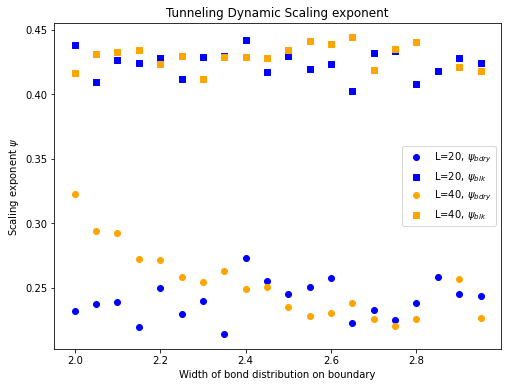

In [278]:
plt.figure(figsize=(8, 6))

for i, L in enumerate(L_list):
    plt.scatter(w_vals_comp[i], psi_vals_bdry_comp[i], marker='o', label="L="+str(L)+r", $\psi_{bdry}$", c=c_dict[L])
    plt.scatter(w_vals_comp[i], np.array(psi_vals_blk_comp[i])*2, marker='s', label="L="+str(L)+r", $\psi_{blk}$", c=c_dict[L])
    
plt.legend()
plt.title("Tunneling Dynamic Scaling exponent")
plt.ylabel(r"Scaling exponent $\psi$")
plt.xlabel("Width of bond distribution on boundary")


In [70]:
L = 50
fixed_length_slice = log_file[log_file['L']==L]
ts_list = fixed_length_slice['ts'].tolist()

w_vals = fixed_length_slice['w_blk'].tolist()
largest_clust_size = []
var_lcs = [] 
c_list = []
c_dict = {50:'red', 70:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta'}

for index, ts in enumerate(ts_list):

    with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
        clust_list_final = pickle.load(fp)

    #print(input_dict)
    clust_dict_list, reverse_dict_list = [], []

    for core_pair in clust_list_final:
        clust_list_temp = core_pair[0] 
        reverse_list_temp = core_pair[1]
        clust_dict_list+=clust_list_temp
        reverse_dict_list+=reverse_list_temp

    largest_clust_list = np.array([max([len(clust) for clust in reverse_dict.values() if clust is not None]) for reverse_dict in reverse_dict_list])
    
    largest_clust_size.append(largest_clust_list.mean()/L**2)
    var_lcs.append(largest_clust_list.std()/L**2)
    c_list.append(c_dict[L])

Text(0.5, 1.0, 'Largest Spin Cluster and Variance in Size')

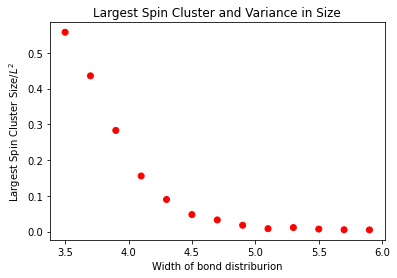

In [71]:
#plt.errorbar(w_vals, largest_clust_size, yerr=var_lcs, marker='o', linestyle='')
plt.scatter(w_vals, largest_clust_size, c=c_list)
plt.ylabel("Largest Spin Cluster Size/$L^2$")
plt.xlabel("Width of bond distriburion")
plt.title("Largest Spin Cluster and Variance in Size")

In [ ]:
L_list = [20, 40, 80]
c_dict = {50:'red', 70:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta'}

w_vals_comp = []
lcs_comp = []
lcs_bdry_comp = []

for L in L_list:
    #fixed_length_slice = log_file[lambda df: (df['L'] == L) & (df['w_blk']==5.0)]
    Lx, Ly = 50, L
    rect_side = "(%d, %d)"%(Lx, Ly)
    fixed_length_slice = log_file[lambda df: (df['L']==rect_side)]
    ts_list = fixed_length_slice['ts'].tolist()
    w_vals = fixed_length_slice['w_bdry'].tolist()
    largest_clust_size = []
    largest_clust_size_bdry = []
    var_lcs = [] 
    c_list = []
    

    for index, ts in enumerate(ts_list):

        with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        #print(input_dict)
        clust_dict_list, reverse_dict_list, bdry_dict_list = [], [], []

        for core_pair in clust_list_final:
            clust_list_temp = core_pair[0]
            reverse_list_temp = core_pair[1]
            bdry_temp = core_pair[2]
            clust_dict_list+=clust_list_temp
            reverse_dict_list+=reverse_list_temp
            bdry_dict_list+=bdry_temp
            
        largest_clust_list_bdry = np.array([max([len(clust) for clust in reverse_dict.values() if clust is not None and bdry_dict_list[i][clust[0]]]) for i,reverse_dict in enumerate(reverse_dict_list)])
        
        largest_clust_list = np.array([max([0]+[len(clust) for clust in reverse_dict.values() if clust is not None]) for reverse_dict in reverse_dict_list])

        
        largest_clust_size.append(largest_clust_list.mean()/L**2)
        largest_clust_size_bdry.append(largest_clust_list_bdry.mean()/L**2)
        #var_lcs.append(largest_clust_list.std()/L**2)
        #c_list.append(c_dict[L])
    
    w_vals_comp.append(w_vals)
    lcs_comp.append(largest_clust_size)
    lcs_bdry_comp.append(largest_clust_size_bdry)

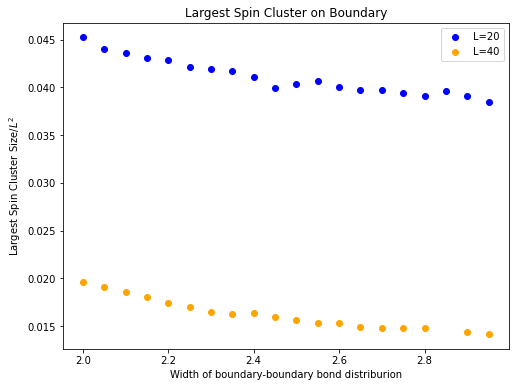

In [252]:
plt.figure(figsize=(8, 6))
c_dict = {10:'red', 20:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta'}

for i, L in enumerate(L_list):
    plt.scatter(w_vals_comp[i], lcs_comp[i], c=c_dict[L], label='L='+str(L))
    #plt.scatter(w_vals_comp[i], lcs_bdry_comp[i], c=c_dict[L], label='L='+str(L), marker='x')
    
    
    #plt.scatter(set_49_runs[0][i], set_49_runs[1][i], c=c_dict[L], label='L='+str(L), marker='o', s=30)
    #plt.scatter(set_50_runs[0][i], set_50_runs[1][i], c=c_dict[L], marker='^', s=30)
    #plt.scatter(set_51_runs[0][i], set_51_runs[1][i], c=c_dict[L], marker='s', s=30)
    
    
plt.ylabel("Largest Spin Cluster Size/$L^2$")
plt.xlabel("Width of boundary-boundary bond distriburion")
plt.title("Largest Spin Cluster on Boundary")
#plt.xlim(4.5, 5.5)
#plt.ylim(0, 0.1)
plt.legend()

In [61]:
def extract_cluster_sizes(reverse_dict_list, bdry_dict_list, on_bdry=False):
    clust_size_list = []
    for i, reverse_dict in enumerate(reverse_dict_list):
        bdry_dict = bdry_dict_list[i]
        for cluster in reverse_dict.values():
            if cluster is None: continue
            if not bdry_dict[cluster[0]] == on_bdry: continue
            clust_size_list.append(len(cluster))
    return np.array(clust_size_list)

def get_distribution_curvature(hist, bin_edges):
    width = bin_edges[1]-bin_edges[0]
    x = bin_edges[1:]-width/2   #Realigning x-axis
    
    cdf = np.cumsum(hist)        #Cumulative distribution function for pdf given by histogram
    smooth = gaussian_filter1d(cdf, 1)       #Gaussian smoothing of cdf function in order to take derivative
    second_der = np.gradient(np.gradient(smooth))
    a = np.diff(np.sign(np.diff(second_der))).nonzero()[0] + 1    #Checking where there is a jump in cdf
    
    infl_size = second_der[a[-2]]-second_der[a[-1]]            #Size of the last jump (empirically determined)
    
    return infl_size

In [59]:
L_list = [60]#, 70, 85, 50]
clust_size_list_comp = []
clust_size_list_bdry_comp = []
w_vals_comp = []
run_dir = "bdry_run_set_1/"
log_file = pd.read_csv(run_dir+"bdry_log_file.csv")

for L in L_list:
    fixed_length_slice = log_file[lambda df: (df['L'] == L)]
    ts_list = fixed_length_slice['ts'].tolist()

    w_vals = fixed_length_slice['w_blk'].tolist()
    clust_size_list = []
    clust_size_list_alt = []
    clust_dict_list_bdry = []
    

    for index, ts in enumerate(ts_list):

        with open(run_dir+"IsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        #print(input_dict)
        clust_dict_list, reverse_dict_list, bdry_dict_list = [], [], []

        for core_pair in clust_list_final:
            clust_list_temp, reverse_list_temp,bdry_list_temp = core_pair
            clust_dict_list+=clust_list_temp
            reverse_dict_list+=reverse_list_temp
            bdry_dict_list+=bdry_list_temp
        
        #Below is for all spins, boundary and not on boundary
        #clust_sizes = np.array(list(itertools.chain.from_iterable([[len(clust) for clust in rd.values() if clust is not None] for rd in reverse_dict_list])))
        
        #List of sizes of all clusters normalized to system size
        
        #Below is for spins exclusively on the boundary
        clust_sizes_bdry = extract_cluster_sizes(reverse_dict_list, bdry_dict_list, on_bdry=True)
        
        #Below is for spins exclusively not on the boundary
        clust_sizes = extract_cluster_sizes(reverse_dict_list, bdry_dict_list)
        
        
        clust_size_list.append(clust_sizes[clust_sizes!=1]/L**2)
        clust_dict_list_bdry.append(clust_sizes_bdry[clust_sizes_bdry!=1]/L**2)
    w_vals_comp.append(w_vals)
    clust_size_list_comp.append(clust_size_list)
    clust_size_list_bdry_comp.append(clust_dict_list_bdry)

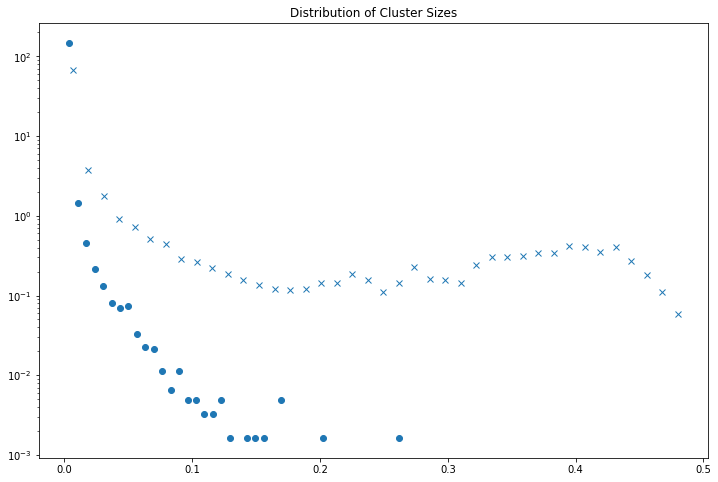

In [60]:
from scipy.ndimage import gaussian_filter1d
import scipy.signal as sg

fig, ax0 = plt.subplots(figsize=(12, 8))

c_dict = {50:'red', 70:'blue', 60:'green', 80:'cyan', 30:'orange', 100:'magenta', 85:'orange'}
cmap_type = {50:'Greens', 60:'Blues', 80:'Reds', 100:'Greys'}
for ind, L in enumerate(L_list):
    curve_check = []
    curve_check_bdry = []
    mean_clust_size = []
    cdf_max = []
    for index, w in enumerate(w_vals_comp[ind]):
        #if not index%2==0: continue
        if not index==3: continue    
        cmap_L = cm.get_cmap(cmap_type[L])
        norm = plt.Normalize(1, 4)
        hist, bin_edges = np.histogram(clust_size_list_comp[ind][index], density=True, bins=40)
        width = bin_edges[1]-bin_edges[0]
        x = bin_edges[1:]-width/2
        ax0.scatter(x, hist)
        
        infl_size = get_distribution_curvature(hist, bin_edges)
        curve_check.append(infl_size)
        #cdf_max.append(cdf[-1])
        #Attempt at doing statistics on cluster sizes
        """
        cs_list = clust_size_list_comp[ind][index]
        cs_list = cs_list[cs_list>(0.8*L/(L*L))]
        mean_clust_size.append(np.median(cs_list))
        """
        
        #Attempt at checking concavity of the distribution to identify transition
        """
        raw = np.log(hist)[5:]
        ax0.plot(raw, color=cmap_L(norm(w)))
        smooth = gaussian_filter1d(raw, 1)
        ax0.plot(smooth, color=cmap_L(norm(w)), linestyle='--')
        smooth_d1 = np.gradient(smooth[smooth>-4])
        curve_check.append(np.sum(smooth_d1))
        """
        
        hist, bin_edges = np.histogram(clust_size_list_bdry_comp[ind][index], density=True, bins=40)
        width = bin_edges[1]-bin_edges[0]
        x = bin_edges[1:]-width/2
        ax0.plot(x, hist, marker='x', linestyle='')
        cdf = np.cumsum(hist)
        smooth = gaussian_filter1d(cdf, 1)
        second_der = np.gradient(np.gradient(smooth))
        a = np.diff(np.sign(np.diff(second_der))).nonzero()[0] + 1
        infl_size = second_der[a[-2]]-second_der[a[-1]]
        curve_check_bdry.append(infl_size)
    
    #ax0.plot(w_vals_comp[ind], mean_clust_size, c=c_dict[L], marker='o')
    #ax0.scatter(w_vals_comp[ind], cdf_max, c=c_dict[L], marker='o')
    #ax0.scatter(w_vals_comp[ind], curve_check, c=c_dict[L], marker='o')
    #ax0.scatter(w_vals_comp[ind], curve_check_bdry, c=c_dict[L], marker='x')
    #fig, ax = plt.subplots(figsize=(6, 1))
    #fig.subplots_adjust(bottom=0.5)
    #cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap_L,
    #                            norm=norm,
    #                            orientation='horizontal')
    
ax0.set_title("Distribution of Cluster Sizes")
#ax0.xscale('log')
ax0.set_yscale('log')
#plt.legend()
#plt.xlim(2,4)

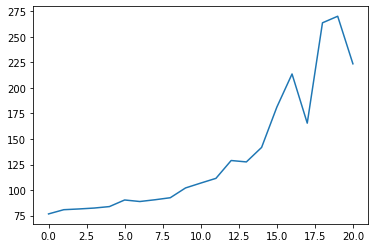

In [104]:
plt.plot(cdf_max)

In [188]:
def check_percolation(clust_dict, L):
    end_point = L-1
    for y1 in range(L):
        for y2 in range(L):
            start_ind = index_map(0, y1, L)
            end_index = index_map(end_point, y2, L)
            if (clust_dict[start_ind] == clust_dict[end_index]): 
                return True
    return False
        
def check_percolation_strip(clust_dict, L, width):
    end_point = L-1
    for y1 in range(L):
        for y1_width in range(0, width+1):
            for y2 in range(L):
                for y2_width in range(-width, 1):
                    start_ind = index_map(y1_width%L, y1, L)
                    end_index = index_map((end_point+y2_width)%L, y2, L)
                    if (clust_dict[start_ind] == clust_dict[end_index]): 
                        return True
    return False
        
def check_percolation_1D(clust_dict, Lx, Ly, zone_size):
    end_point = Ly/2
    for y1 in range(-zone_size, zone_size+1):
        for x1 in range(0, zone_size+1):
            for y2 in range(-zone_size, zone_size+1):
                for x2 in range(0, zone_size+1):
                    start_ind = index_map_rect(x1, y1%Ly, Lx, Ly)
                    end_ind = index_map_rect(x2, (end_point+y2)%Ly, Lx, Ly)
                    if (clust_dict[start_ind] == clust_dict[end_ind]): 
                        return True
    return False

Text(0.5, 1.0, 'Percolation Transition')

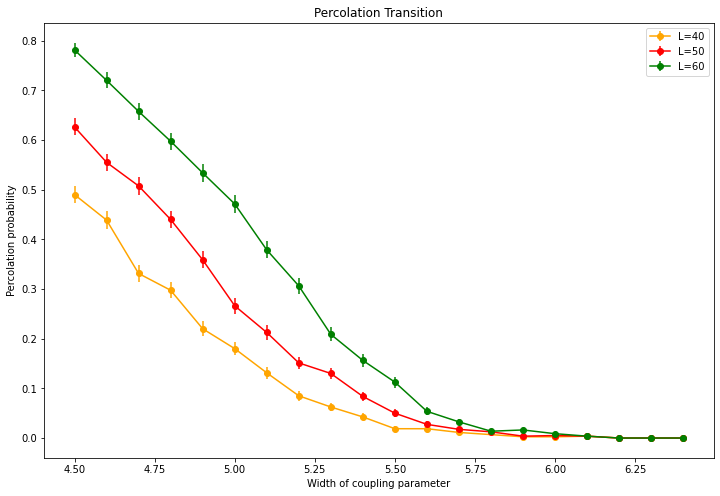

In [49]:
plt.figure(figsize=(12, 8))
c_dict = {50:'red', 70:'blue', 60:'green', 80:'cyan', 40:'orange', 100:'magenta'}
L_list = [40, 50, 60]
perc_prob_comp = []
perc_w_vals_comp = []


for L in L_list:
    fixed_length_slice = log_file[lambda df: (df['L'] == L)]
    ts_list = fixed_length_slice['ts'].tolist()
    w_vals = fixed_length_slice['w_bdry'].tolist()
    n_runs_list = fixed_length_slice['n_runs'].tolist()

    p_perc_clust = []
    p_perc_clust_err = []
    c_list = []
    

    for index, ts in enumerate(ts_list):

        with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        #print(input_dict)
        clust_dict_list, reverse_dict_list = [], []
        perc_cluster = []

        for core_pair in clust_list_final:
            clust_list_temp = core_pair[0]
            reverse_list_temp = core_pair[1]
            clust_dict_list+=clust_list_temp
            reverse_dict_list+=reverse_list_temp

        perc_prob_temp = np.array([check_percolation_strip(clust, L, int(L/4)) for clust in clust_dict_list])

        p_perc_clust.append(perc_prob_temp.mean())
        p_perc_clust_err.append(perc_prob_temp.std()/np.sqrt(n_runs_list[index] - 1))
        c_list.append(c_dict[L])
   
    #plt.scatter(w_vals, p_perc_clust, c=c_list, label="L="+str(L))
    #plt.errorbar(w_vals, p_perc_clust, yerr=p_perc_clust_err, c=c_dict[L], label="L="+str(L))
    
    sorted_y = np.array([x for _,x in sorted(zip(w_vals,p_perc_clust))])
    sorted_y_err = np.array([x for _,x in sorted(zip(w_vals,p_perc_clust_err))])
    sorted_x = np.array(sorted(w_vals))
    plt.errorbar(sorted_x, sorted_y, c=c_dict[L], label="L="+str(L), marker='o', yerr=sorted_y_err)
    
    perc_prob_comp.append(sorted_y)
    perc_w_vals_comp.append(sorted_x)
    #x_lin = np.linspace(1.4, 3.8, 200)
    #plt.plot(x_lin, sigmoid_func(x_lin, *popt))
    

plt.legend()
plt.ylabel("Percolation probability")
plt.xlabel("Width of coupling parameter")
plt.title("Percolation Transition")

#Width=0, transition in between w=2.52 and w=2.56 region (run_set_1)

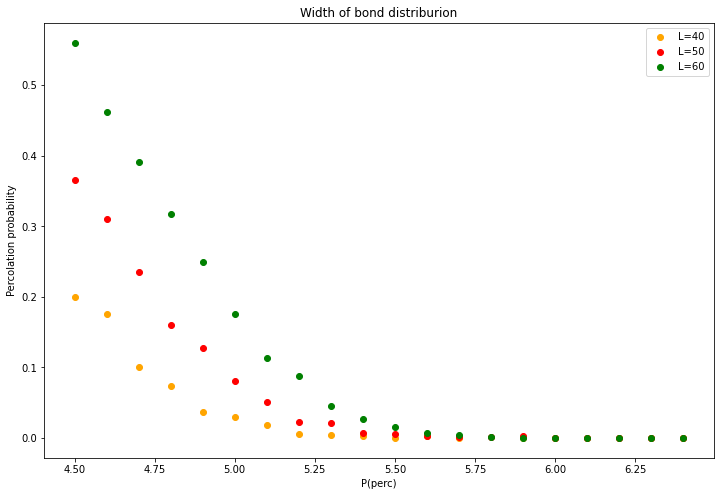

In [10]:
plt.figure(figsize=(12, 8))
for i, L in enumerate(L_list):
    plt.scatter(perc_w_vals_comp[i], perc_prob_comp[i], c=c_dict[L], label='L='+str(L))
    
plt.ylabel("Percolation probability")
plt.title("Width of bond distriburion")
plt.xlabel("P(perc)")

#plt.xlim(4.5, 5.5)
#plt.ylim(0, 0.1)
plt.legend()

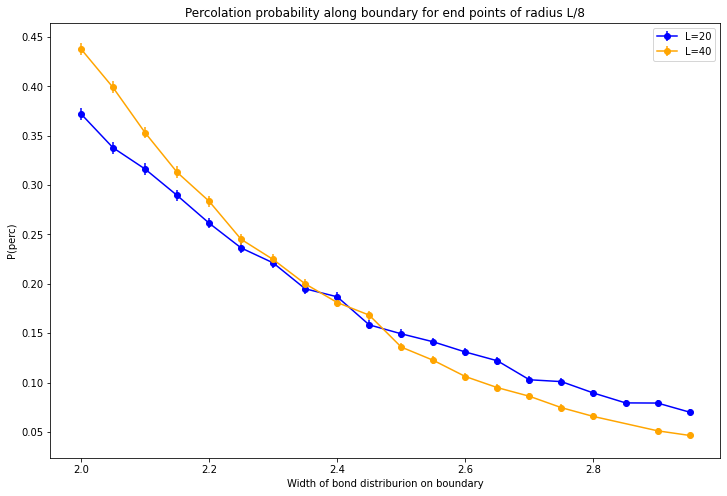

In [258]:
plt.figure(figsize=(12, 8))
c_dict = {10:'red', 20:'blue', 60:'green', 80:'brown', 40:'orange', 100:'magenta'}
L_list = [20, 40]
width_dict = {0:'o', 1:'s', 2:'^', 3:'green'}

for zone_width in [2]:
    perc_prob_comp = []
    perc_w_vals_comp = []
    perc_err_comp = []
    
    for L in L_list:
        Lx, Ly = 50, L
        rect_side = "(%d, %d)"%(Lx, Ly)
        fixed_length_slice = log_file[lambda df: (df['L']==rect_side)]
        #fixed_length_slice = log_file[lambda df: (df['L'] == L)]
        ts_list = fixed_length_slice['ts'].tolist()
        w_vals = fixed_length_slice['w_bdry'].tolist()
        n_runs_list = fixed_length_slice['n_runs'].tolist()

        p_perc_clust = []
        p_perc_clust_err = []
        c_list = []


        for index, ts in enumerate(ts_list):

            with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
                clust_list_final = pickle.load(fp)

            #print(input_dict)
            clust_dict_list, reverse_dict_list = [], []
            perc_cluster = []

            for core_pair in clust_list_final:
                clust_list_temp = core_pair[0]
                reverse_list_temp = core_pair[1]
                clust_dict_list+=clust_list_temp
                reverse_dict_list+=reverse_list_temp
            
            zone_width = int(L/10)
            perc_prob_temp = np.array([check_percolation_1D(clust, Lx, Ly, zone_width) for clust in clust_dict_list])

            p_perc_clust.append(perc_prob_temp.mean())
            p_perc_clust_err.append(perc_prob_temp.std()/np.sqrt(n_runs_list[index] - 1))
            c_list.append(c_dict[L])

        #plt.scatter(w_vals, p_perc_clust, c=c_list, label="L="+str(L))
        #plt.errorbar(w_vals, p_perc_clust, yerr=p_perc_clust_err, c=c_dict[L], label="L="+str(L))

        sorted_y = np.array([x for _,x in sorted(zip(w_vals,p_perc_clust))])
        sorted_y_err = np.array([x for _,x in sorted(zip(w_vals,p_perc_clust_err))])
        sorted_x = np.array(sorted(w_vals))
        plt.errorbar(sorted_x, sorted_y, c=c_dict[L], label="L="+str(L), yerr=sorted_y_err, marker='o')

        perc_prob_comp.append(sorted_y)
        perc_w_vals_comp.append(sorted_x)
        perc_err_comp.append(sorted_y_err)
        #x_lin = np.linspace(1.4, 3.8, 200)
        #plt.plot(x_lin, sigmoid_func(x_lin, *popt))


    plt.legend()
    plt.title("Percolation probability along boundary for end points of radius L/8")
    plt.xlabel("Width of bond distriburion on boundary")
    plt.ylabel("P(perc)")

#Width=0, transition in between w=2.52 and w=2.56 region (run_set_1)

Text(0, 0.5, 'P(perc)')

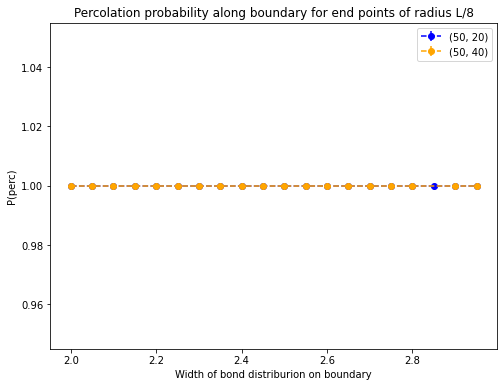

In [257]:
c_dict = {10:'red', 20:'blue', 60:'green', 80:'brown', 40:'orange', 100:'magenta'}

plt.figure(figsize=(8, 6))
for i, L in enumerate(L_list):
    if L==10: continue
    plt.errorbar(perc_w_vals_comp[i], perc_prob_comp[i], yerr=perc_err_comp[i], c=c_dict[L], label='(50, '+str(L)+')', marker='o', linestyle='--')
    
#plt.xlim(4.5, 5.5)
#plt.ylim(0, 0.1)
plt.legend()

plt.title("Percolation probability along boundary for end points of radius L/8")
plt.xlabel("Width of bond distriburion on boundary")
plt.ylabel("P(perc)")

#plt.savefig("Percolation_bdry_sweep")

In [175]:
import matplotlib as mpl
import matplotlib.cm as cm

run_dir = "bdry_sweep_BlC/"
log_file = pd.read_csv(run_dir+"bdry_log_file.csv")
L = 60
fixed_log_slice = log_file[lambda df: (df['L'] == L) & (df['w_bdry']==1.6)]
ts_list = fixed_log_slice['ts'].tolist()
ts = str(ts_list[0])


with open(run_dir+"LIsingB_2D_clusters_"+ts+".pkl", "rb") as fp:   
    clust_list_final = pickle.load(fp)

plt.figure(figsize=(12, 8))
clust_dict = clust_list_final[1][0][0]
reverse_dict = clust_list_final[1][1][0]
bdry_dict = clust_list_final[1][2][0]

clust_size_list = [len(clust) for clust in reverse_dict.values() if clust is not None]
norm = mpl.colors.Normalize(vmin=1, vmax=max(clust_size_list))
cmap = 'viridis'#cm.hsv
m = cm.ScalarMappable(norm=norm, cmap=cmap)

for x in range(L):
    for y in range(L):
        
        site_ind = index_map(x, y, L)
        """
        if clust_dict[site_ind] == site_ind: c='blue'
        else: 
            c = m.cmap(len(reverse_dict[clust_dict[site_ind]]))
        """
        c = m.cmap(norm(len(reverse_dict[clust_dict[site_ind]])))
        if bdry_dict[site_ind]: m_type = 's'
        else: m_type= 'o'
        plt.scatter(y+(0.25*(-1)**(x%2)), x, color=c, s= 80, marker=m_type)
        

plt.gca().invert_yaxis()

IndexError: list index out of range

In [55]:
L_list = [40, 50, 60]
c_dict = {40:'red', 50:'magenta', 60:'blue', 80:'green', 70:'orange'}


w_vals_comp = []
moment_array_comp_blk, moment_array_comp_bdry = [], []

for L in L_list:
    log_file = pd.read_csv(run_dir+"bdry_log_file.csv")
    fixed_length_slice = log_file[lambda df: (df['L'] == L)] #& (df['a']==0.1)]
    ts_list = fixed_length_slice['ts'].tolist()

    w_vals = fixed_length_slice['w_bdry'].tolist()
    #misc_notes = fixed_length_slice['misc'].tolist()
    mean_moment_list_blk, mean_moment_list_bdry = [], []
    w_list = []

    for index, ts in enumerate(ts_list):
        with open(run_dir+"LIsingB_2D_clusters_"+str(ts)+".pkl", "rb") as fp:   
            clust_list_final = pickle.load(fp)

        bdry_moment_list_temp, blk_moment_list_temp = [], []
        for core_pair in clust_list_final:
            bdry_moment_list_temp+=core_pair[4]
            blk_moment_list_temp+=core_pair[5]
            
        mean_moment_list_blk.append(np.array(blk_moment_list_temp).mean(axis=0))
        mean_moment_list_bdry.append(np.array(bdry_moment_list_temp).mean(axis=0))
        w_list.append(w_vals[index])
        
    w_vals_comp.append(w_list)
    moment_array_comp_blk.append(mean_moment_list_blk)
    moment_array_comp_bdry.append(mean_moment_list_bdry)

[  0.79599515 193.74767842]


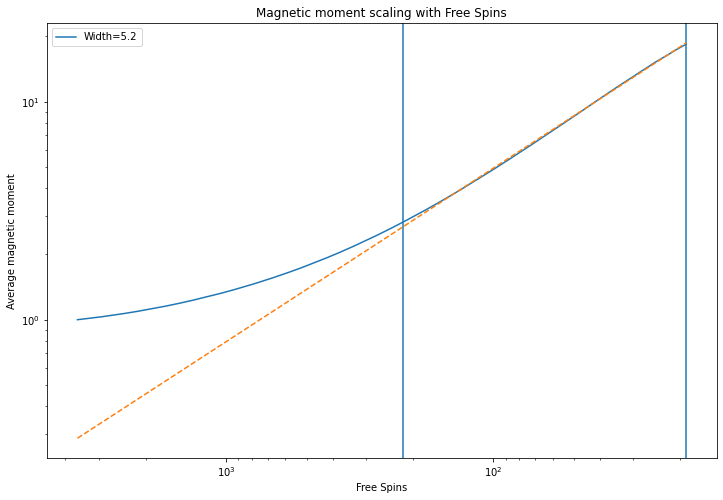

In [71]:
plt.figure(figsize=(12, 8))

for ind, L in enumerate(L_list):
    if not L==60: continue
    for index, w in enumerate(w_vals_comp[ind]):
        #if not index==6: continue
        if not w==5.2: continue
        y_data_blk = moment_array_comp_blk[ind][index]
        x_axis = L*L - np.arange(len(y_data_blk))
        plt.plot(x_axis, y_data_blk, label="Width="+str(w))
        
        #y_data_bdry = moment_array_comp_bdry[ind][index]
        #plt.plot(x_axis, y_data_bdry)
        
        
start = -200
end = -1
plt.axvline(x=x_axis[start])
plt.axvline(x=x_axis[end])
popt, pcov = curve_fit(power_law_scale, x_axis[start:end], y_data_blk[start:end])
plt.plot(x_axis, power_law_scale(x_axis, *popt), linestyle='--')
#plt.text(s=r"$\overline{\mu}=N^{-%f}$" %popt[0], x=L*L, y = 3, size=15)
plt.title("Magnetic moment scaling with Free Spins")
plt.xlabel("Free Spins")
plt.ylabel("Average magnetic moment")
print(popt)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()



In [89]:
L = 4
adj_ind = triangle_nn_indices(L)
adj_ind

{0: [1, 3, 4, 12, 7, 15],
 1: [2, 0, 5, 13, 4, 12],
 2: [3, 1, 6, 14, 5, 13],
 3: [0, 2, 7, 15, 6, 14],
 4: [5, 7, 8, 0, 9, 1],
 5: [6, 4, 9, 1, 10, 2],
 6: [7, 5, 10, 2, 11, 3],
 7: [4, 6, 11, 3, 8, 0],
 8: [9, 11, 12, 4, 15, 7],
 9: [10, 8, 13, 5, 12, 4],
 10: [11, 9, 14, 6, 13, 5],
 11: [8, 10, 15, 7, 14, 6],
 12: [13, 15, 0, 8, 1, 9],
 13: [14, 12, 1, 9, 2, 10],
 14: [15, 13, 2, 10, 3, 11],
 15: [12, 14, 3, 11, 0, 8]}

In [279]:
np.arange(1.5, 3, 0.15)

array([1.5 , 1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85])

In [36]:
a = np.array([1, 0, 0, 0])
len(np.nonzero(a)[0])

1